In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

In [3]:
#Loading Data
orders = pd.read_csv("data/processed/orders_clean.csv", parse_dates=[
    "order purchase timestamp", "order approved at",
    "order delivered carrier date", "order delivered customer date",
    "order estimated delivery date"
])
order_items = pd.read_csv("data/processed/order_items_clean.csv")
customers = pd.read_csv("data/processed/customers_clean.csv")
products = pd.read_csv("data/processed/products_clean.csv")
sellers = pd.read_csv("data/processed/sellers_clean.csv")
payments = pd.read_csv("data/processed/payments_clean.csv")
reviews = pd.read_csv("data/processed/reviews_clean.csv", parse_dates=[
        "review creation date", "review answer timestamp"
])
geolocation = pd.read_csv("data/processed/geolocation_clean.csv")

In [4]:
sns.set_style("whitegrid")
%matplotlib inline

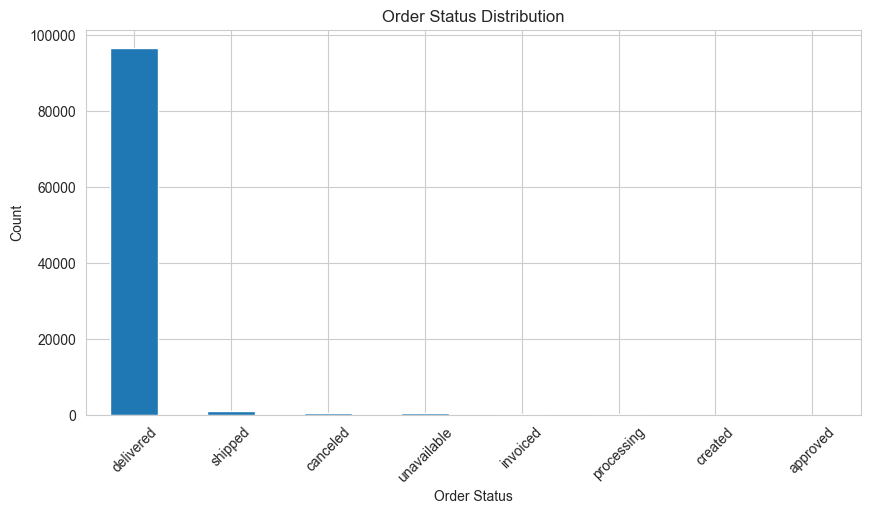

In [5]:
# Order Status Distribution
orders['order status'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

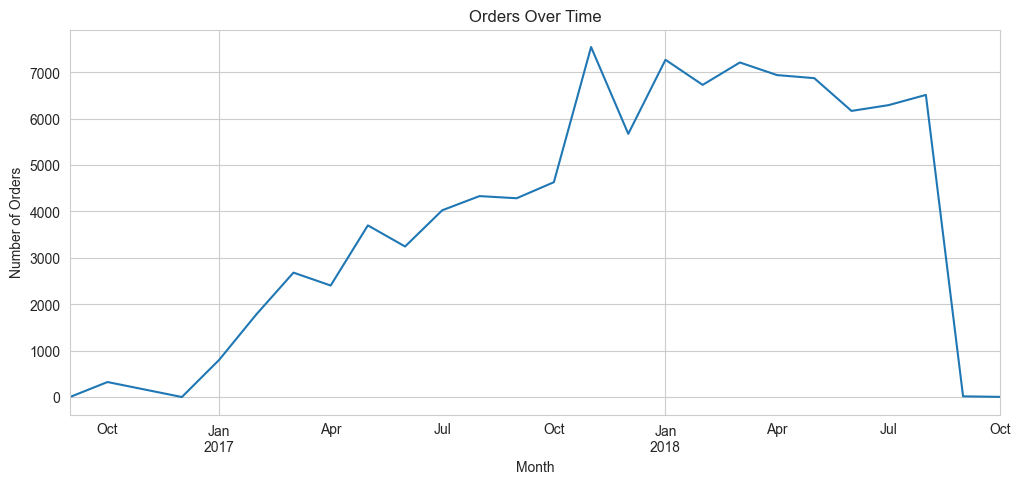

In [6]:
# Orders Over Time
orders.groupby(orders['order purchase timestamp'].dt.to_period('M')).size().plot(kind='line', figsize=(12, 5))
plt.title('Orders Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

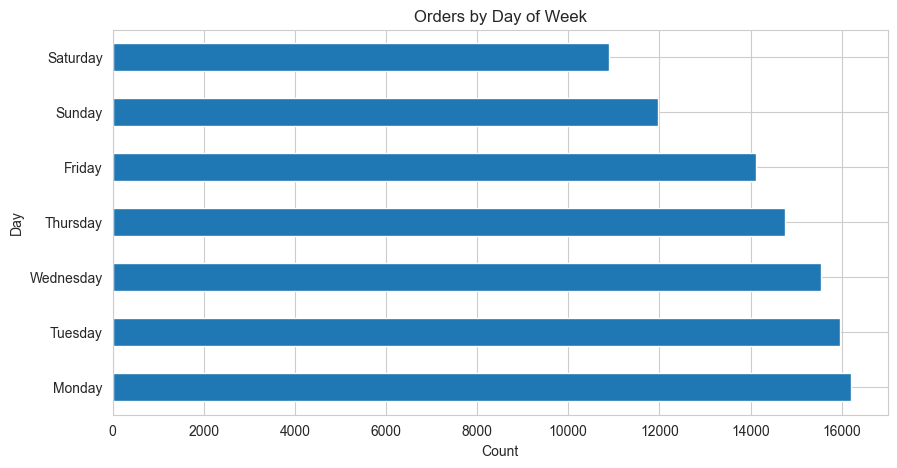

In [10]:
# Orders by Day of Week
orders['order purchase timestamp'].dt.day_name().value_counts().plot(kind='barh', figsize=(10, 5))
plt.title('Orders by Day of Week')
plt.xlabel('Count')
plt.ylabel('Day')
plt.show()

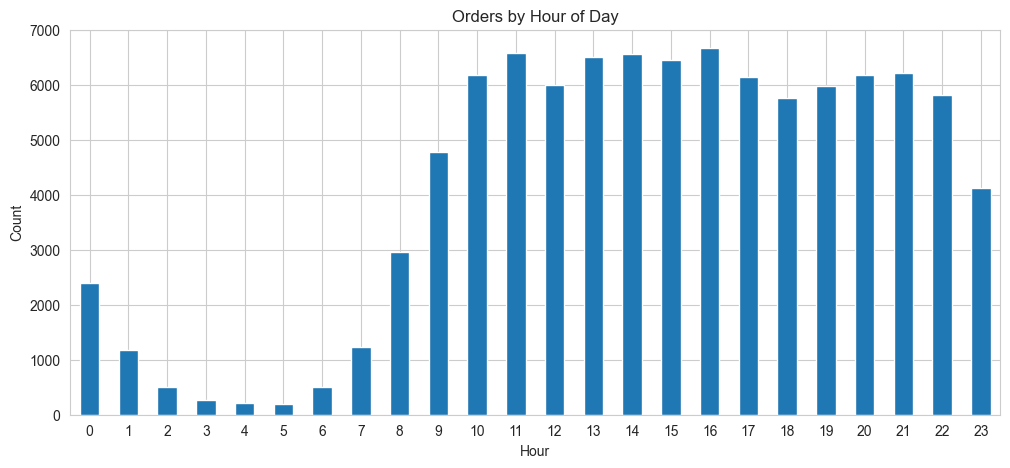

In [16]:
# Orders by Hour
orders['order purchase timestamp'].dt.hour.value_counts().sort_index().plot(kind='bar', figsize=(12, 5))
plt.title('Orders by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [17]:
# Total Orders
print(f"Total Orders: {orders['order id'].nunique()}")

# Cancellation Rate
cancel_rate = (orders['order status'] == 'canceled').mean() * 100
print(f"Cancellation Rate: {cancel_rate:.2f}%")

# Delivery Rate
delivery_rate = (orders['order status'] == 'delivered').mean() * 100
print(f"Delivery Rate: {delivery_rate:.2f}%")

# Average Delivery Time
orders['delivery time'] = (orders['order delivered customer date'] - orders['order purchase timestamp']).dt.days
print(f"Average Delivery Time: {orders['delivery time'].mean():.1f} days")

# Late Delivery Rate
orders['is late'] = orders['order delivered customer date'] > orders['order estimated delivery date']
late_rate = orders['is late'].mean() * 100
print(f"Late Delivery Rate: {late_rate:.2f}%")

Total Orders: 99441
Cancellation Rate: 0.63%
Delivery Rate: 97.02%
Average Delivery Time: 12.1 days
Late Delivery Rate: 7.87%


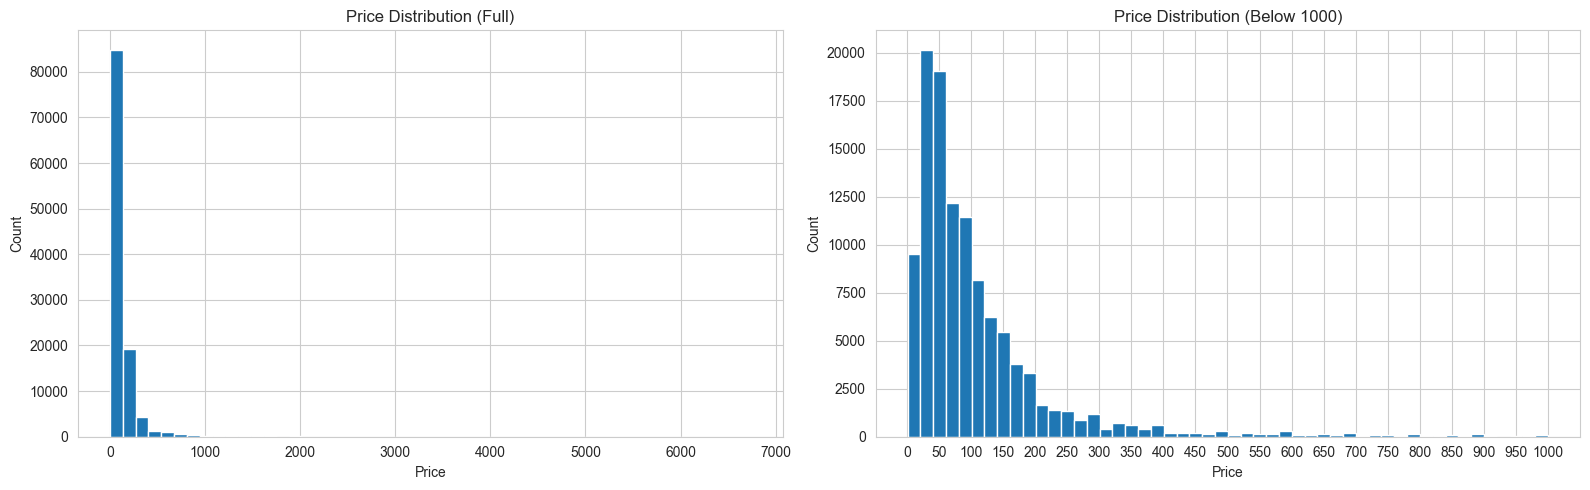

In [62]:
#Price Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Full distribution
order_items['price'].plot(kind='hist', bins=50, ax=ax1)
ax1.set_title('Price Distribution (Full)')
ax1.set_xlabel('Price')
ax1.set_ylabel('Count')

# Zoomed in (below 1000)
order_items[order_items['price'] <= 1000]['price'].plot(kind='hist', bins=50, ax=ax2)
ax2.xaxis.set_major_locator(MultipleLocator(50))
ax2.set_title('Price Distribution (Below 1000)')
ax2.set_xlabel('Price')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

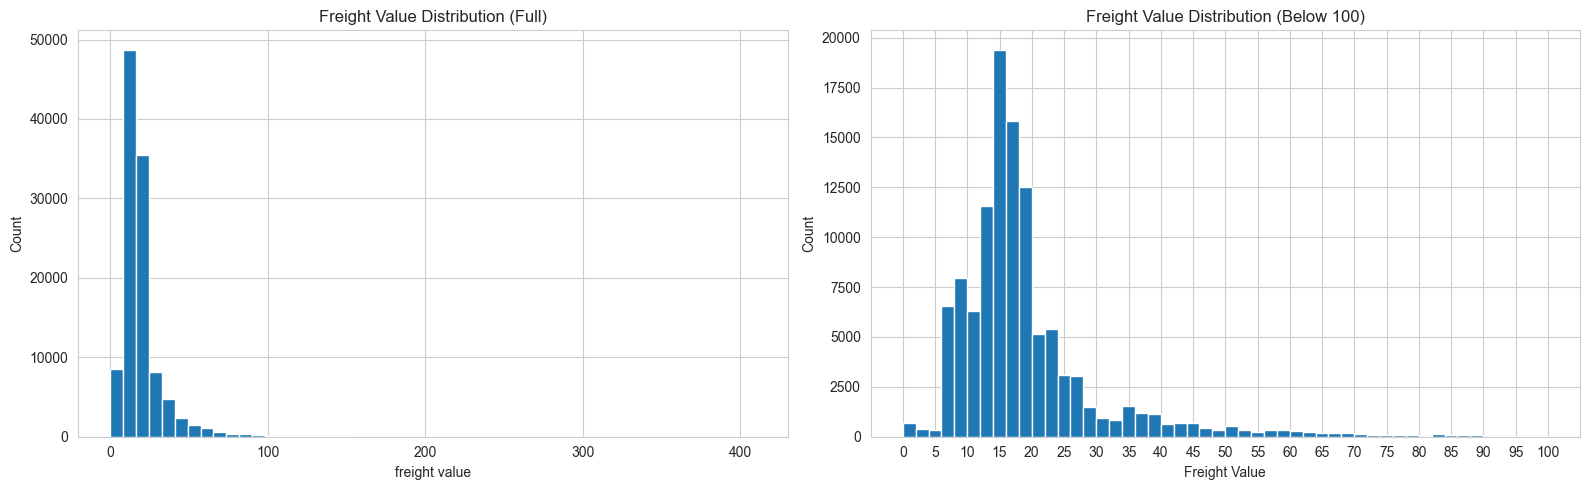

In [60]:
#Freight Value Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Full distribution
order_items['freight value'].plot(kind='hist', bins=50, ax=ax1)
ax1.set_title('Freight Value Distribution (Full)')
ax1.set_xlabel('freight value')
ax1.set_ylabel('Count')

# Zoomed in (below 100)
order_items[order_items['freight value'] <= 100]['freight value'].plot(kind='hist', bins=50, ax=ax2)
ax2.xaxis.set_major_locator(MultipleLocator(5))
ax2.set_title('Freight Value Distribution (Below 100)')
ax2.set_xlabel('Freight Value')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

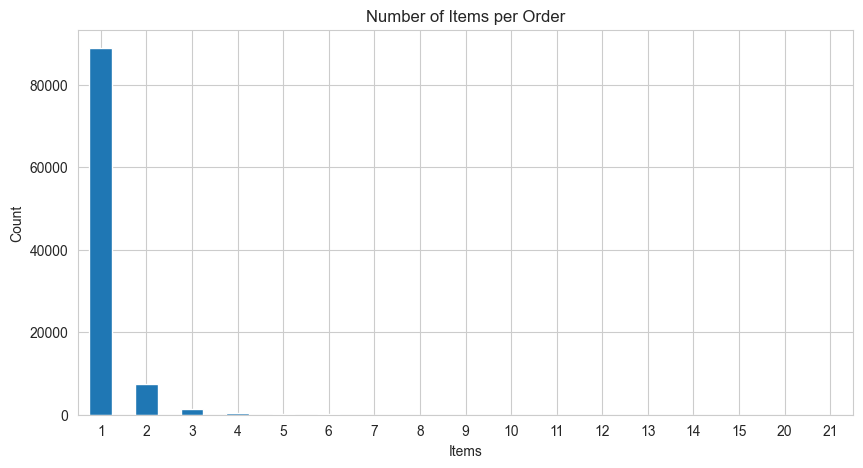

In [65]:
# Items per Order
order_items.groupby('order id')['order item id'].count().value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.title('Number of Items per Order')
plt.xlabel('Items')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [70]:
# GMV - Total transaction value on the platform
gmv = order_items['price'].sum() + order_items['freight value'].sum()
print(f"GMV (Total Platform Transactions): ${gmv:,.2f}")

# Product Sales Volume
total_sales = order_items['price'].sum()
print(f"Total Product Sales: ${total_sales:,.2f}")

# Freight Volume
total_freight = order_items['freight value'].sum()
print(f"Total Freight: ${total_freight:,.2f}")

# Average Order Value (GMV per order)
aov = order_items.groupby('order id')[['price', 'freight value']].sum().sum(axis=1).mean()
print(f"Average Order Value (GMV): ${aov:,.2f}")

# Average Items Value per Order
aov = order_items.groupby('order id')['price'].sum().mean()
print(f"Average Items Value per Order: ${aov:,.2f}")

# Average Freight per Order
avg_freight = order_items.groupby('order id')['freight value'].sum().mean()
print(f"Average Freight per Order: ${avg_freight:,.2f}")

# Average Items per Order
avg_items = order_items.groupby('order id')['order item id'].count().mean()
print(f"Average Items per Order: {avg_items:.2f}")

GMV (Total Platform Transactions): $15,843,553.24
Total Product Sales: $13,591,643.70
Total Freight: $2,251,909.54
Average Order Value (GMV): $160.58
Average Items Value per Order: $137.75
Average Freight per Order: $22.82
Average Items per Order: 1.14


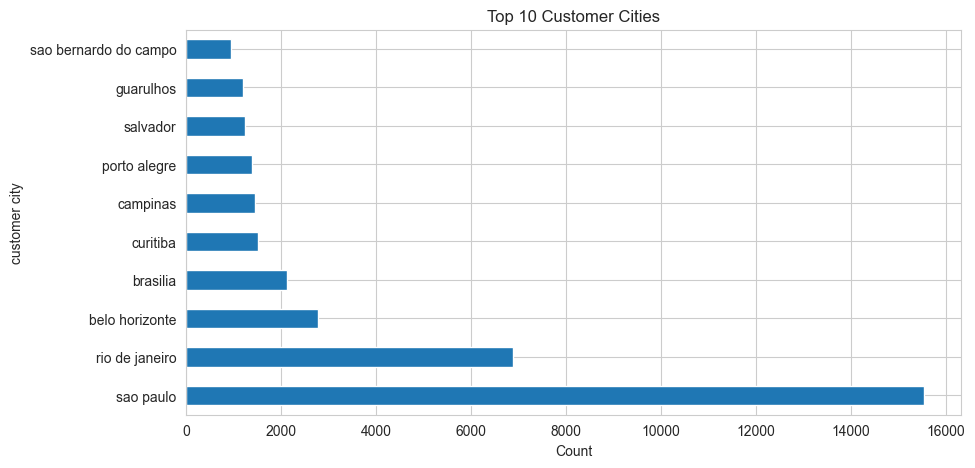

In [71]:
# Top 10 Customer Cities
customers['customer city'].value_counts().head(10).plot(kind='barh', figsize=(10, 5))
plt.title('Top 10 Customer Cities')
plt.xlabel('Count')
plt.show()

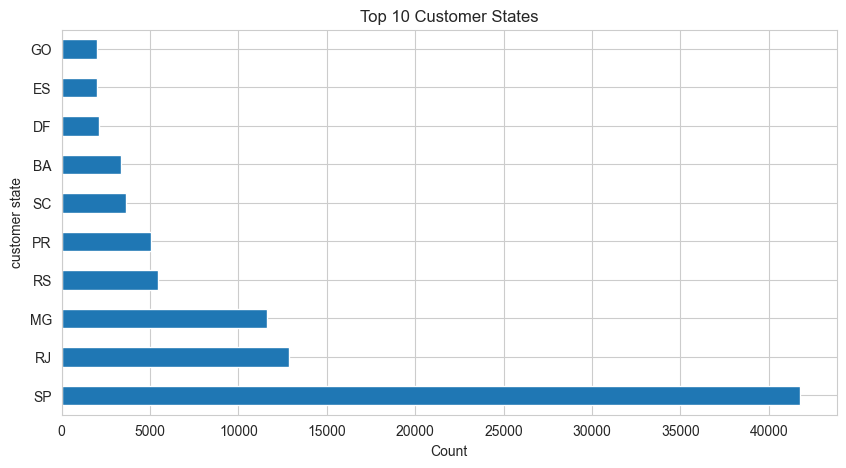

In [72]:
# Top 10 Customer States
customers['customer state'].value_counts().head(10).plot(kind='barh', figsize=(10, 5))
plt.title('Top 10 Customer States')
plt.xlabel('Count')
plt.show()

In [73]:
# Total Unique Customers
print(f"Total Customers: {customers['customer unique id'].nunique()}")

# Customers per State
print(customers['customer state'].value_counts())

Total Customers: 96096
customer state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64


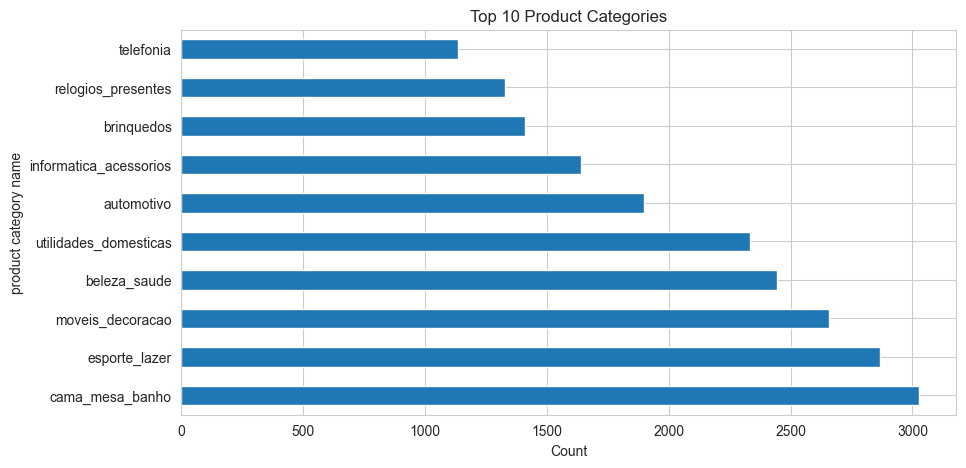

In [74]:
# Top 10 Product Categories
products['product category name'].value_counts().head(10).plot(kind='barh', figsize=(10, 5))
plt.title('Top 10 Product Categories')
plt.xlabel('Count')
plt.show()

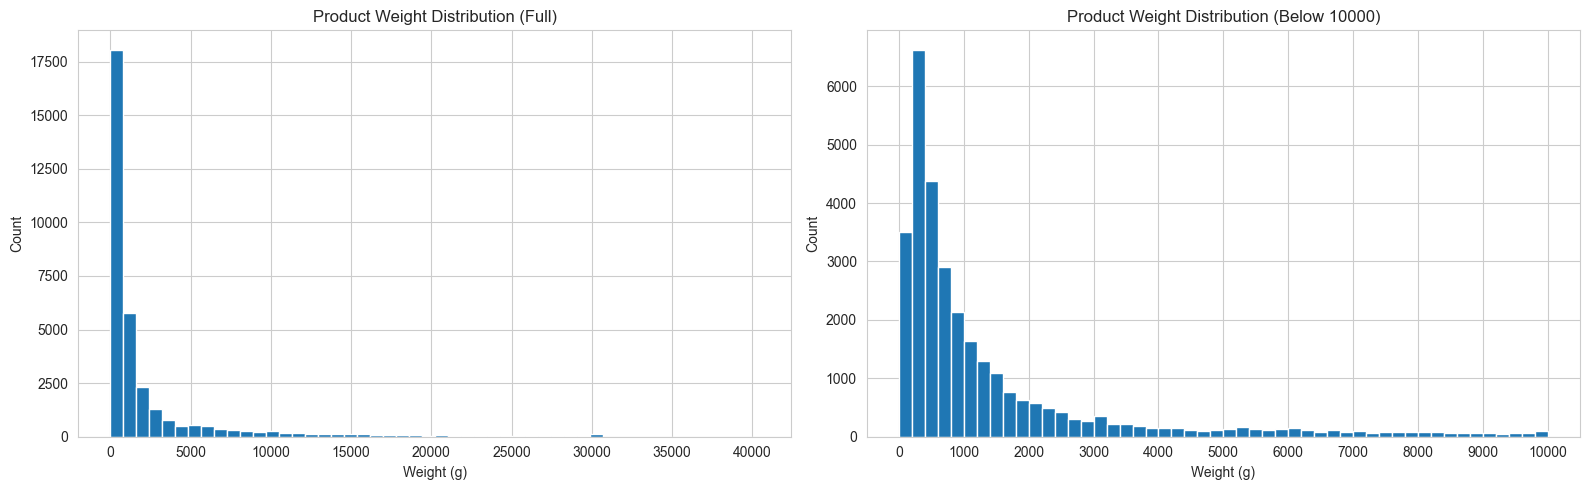

In [91]:
# Product Weight Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Full distribution
products['product weight g'].plot(kind='hist', bins=50, ax=ax1)
ax1.set_title('Product Weight Distribution (Full)')
ax1.set_xlabel('Weight (g)')
ax1.set_ylabel('Count')

# Zoomed in (below 100)
products[products['product weight g'] <= 10000]['product weight g'].plot(kind='hist', bins=50, ax=ax2)
ax2.xaxis.set_major_locator(MultipleLocator(1000))
ax2.set_title('Product Weight Distribution (Below 10000)')
ax2.set_xlabel('Weight (g)')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

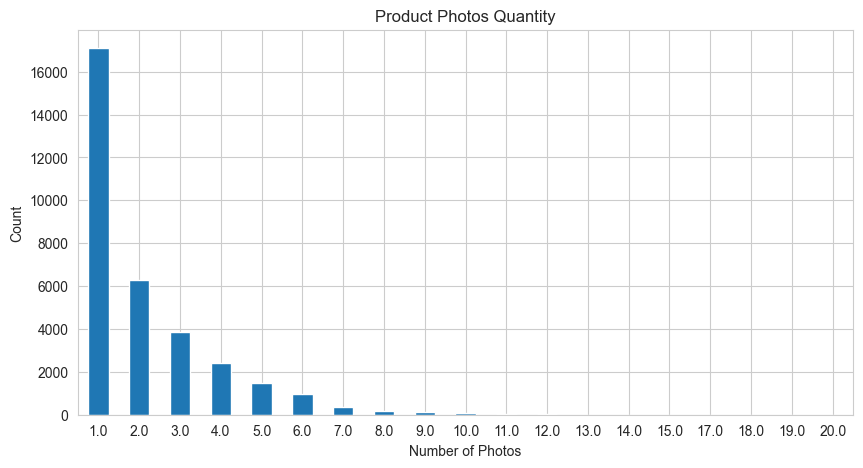

In [84]:
# Product Photos Qty Distribution
products['product photos qty'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.title('Product Photos Quantity')
plt.xlabel('Number of Photos')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [85]:
# Total Products
print(f"Total Products: {products['product id'].nunique()}")

# Total Categories
print(f"Total Categories: {products['product category name'].nunique()}")

# Average Product Weight
print(f"Average Product Weight: {products['product weight g'].mean():.2f}g")

Total Products: 32951
Total Categories: 74
Average Product Weight: 2276.38g


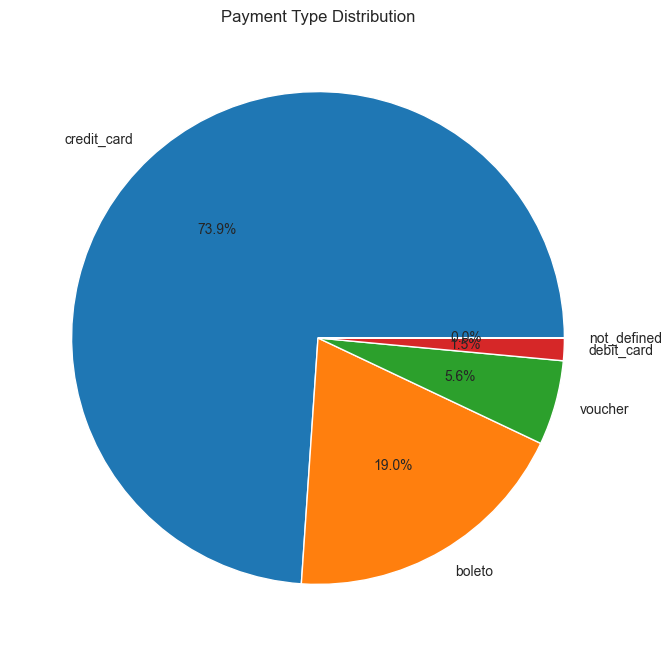

In [92]:
# Payment Type Distribution
payments['payment type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Payment Type Distribution')
plt.show()

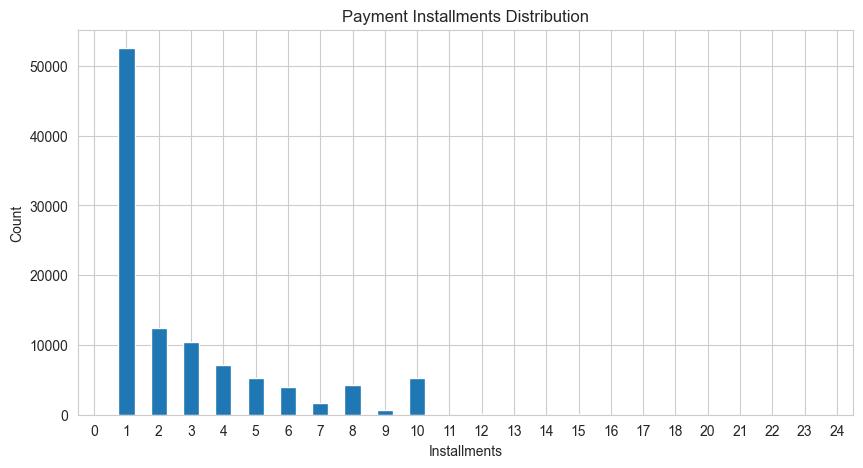

In [100]:
# Payment Installments Distribution
payments['payment installments'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.title('Payment Installments Distribution')
plt.xlabel('Installments')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

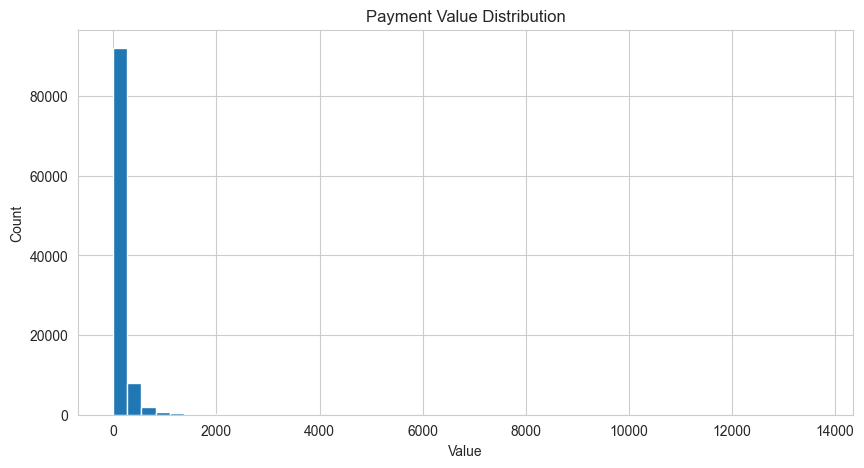

In [101]:
# Payment Value Distribution
payments['payment value'].plot(kind='hist', bins=50, figsize=(10, 5))
plt.title('Payment Value Distribution')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

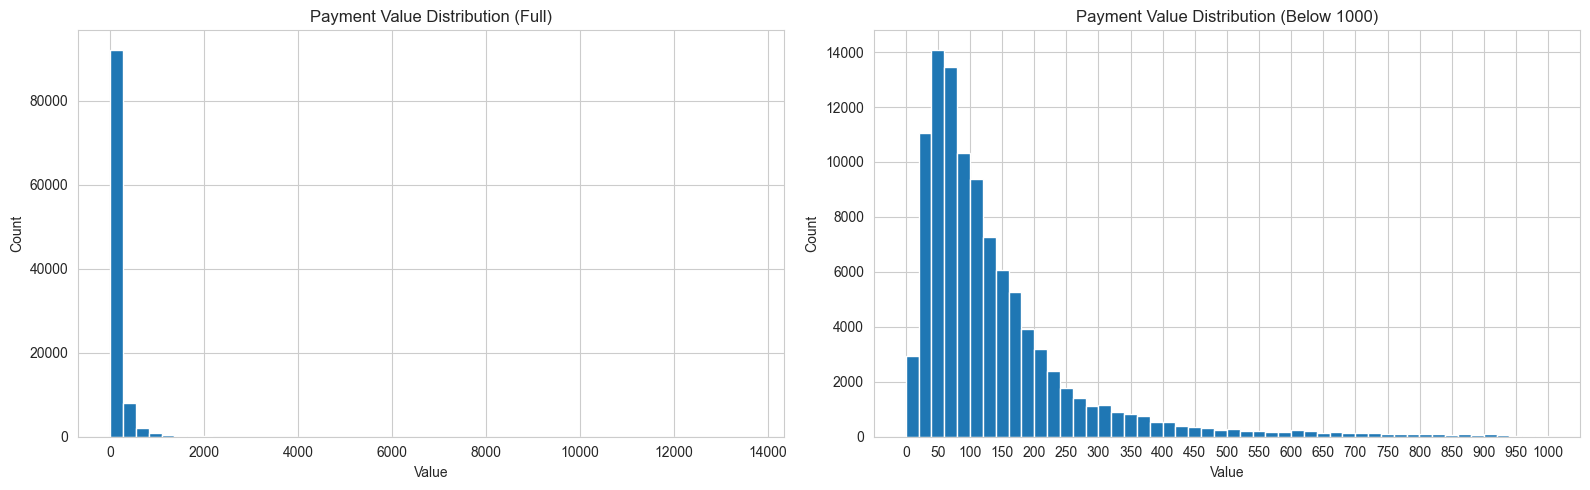

In [111]:
# Product Weight Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Full distribution
payments['payment value'].plot(kind='hist', bins=50, ax=ax1)
ax1.set_title('Payment Value Distribution (Full)')
ax1.set_xlabel('Value')
ax1.set_ylabel('Count')

# Zoomed in (below 100)
payments[payments['payment value'] <= 1000]['payment value'].plot(kind='hist', bins=50, ax=ax2)
ax2.xaxis.set_major_locator(MultipleLocator(50))
ax2.set_title('Payment Value Distribution (Below 1000)')
ax2.set_xlabel('Value')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [112]:
# Total Payment Value
print(f"Total Payment Value: ${payments['payment value'].sum():,.2f}")

# Average Payment Value
print(f"Average Payment Value: ${payments['payment value'].mean():,.2f}")

# Most Used Payment Type
print(f"Most Used Payment: {payments['payment type'].mode()[0]}")

# Average Installments
print(f"Average Installments: {payments['payment installments'].mean():.2f}")

Total Payment Value: $16,008,872.12
Average Payment Value: $154.10
Most Used Payment: credit_card
Average Installments: 2.85


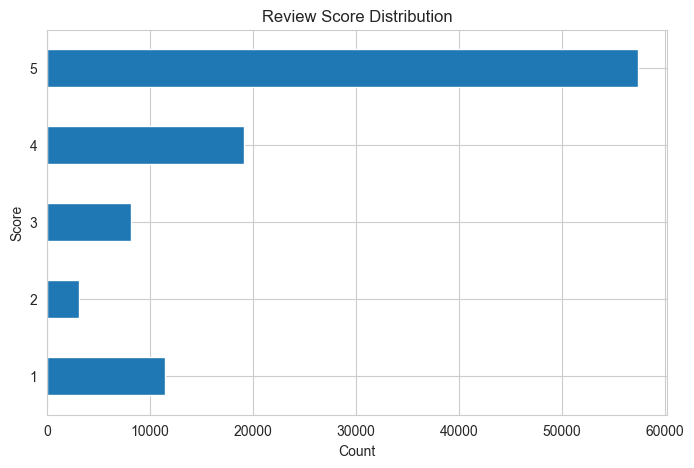

In [115]:
# Review Score Distribution
reviews['review score'].value_counts().sort_index().plot(kind='barh', figsize=(8, 5))
plt.title('Review Score Distribution')
plt.xlabel('Count')
plt.ylabel('Score')
plt.show()

In [116]:
# Average Review Score
print(f"Average Review Score: {reviews['review score'].mean():.2f}")

# Review Response Time
reviews['response time'] = (pd.to_datetime(reviews['review answer timestamp']) - pd.to_datetime(reviews['review creation date'])).dt.days
print(f"Average Review Response Time: {reviews['response time'].mean():.1f} days")

Average Review Score: 4.09
Average Review Response Time: 2.6 days


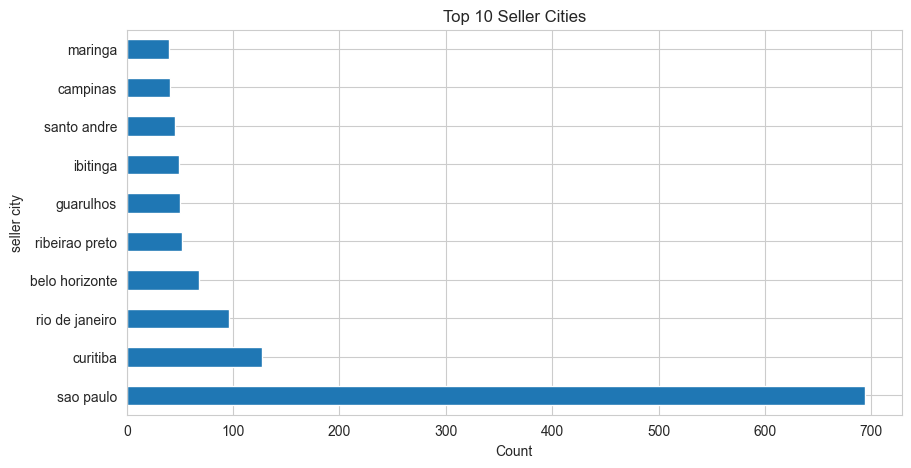

In [117]:
# Top 10 Seller Cities
sellers['seller city'].value_counts().head(10).plot(kind='barh', figsize=(10, 5))
plt.title('Top 10 Seller Cities')
plt.xlabel('Count')
plt.show()

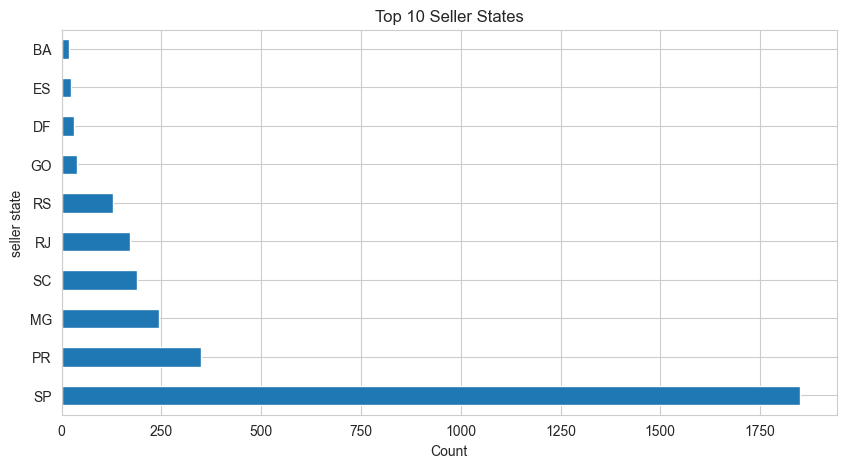

In [118]:
# Top 10 Seller States
sellers['seller state'].value_counts().head(10).plot(kind='barh', figsize=(10, 5))
plt.title('Top 10 Seller States')
plt.xlabel('Count')
plt.show()

In [119]:
# Total Sellers
print(f"Total Sellers: {sellers['seller id'].nunique()}")

# Sellers per State
print(sellers['seller state'].value_counts())

Total Sellers: 3095
seller state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
AC       1
PI       1
MA       1
AM       1
PA       1
Name: count, dtype: int64
